<a href="https://colab.research.google.com/github/yaseen2402/deep-learning/blob/main/fashion_mnist_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(32)

In [3]:
dataset = '/content/drive/My Drive/datasets/fmnist_small.csv'

In [5]:
df = pd.read_csv(dataset)
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


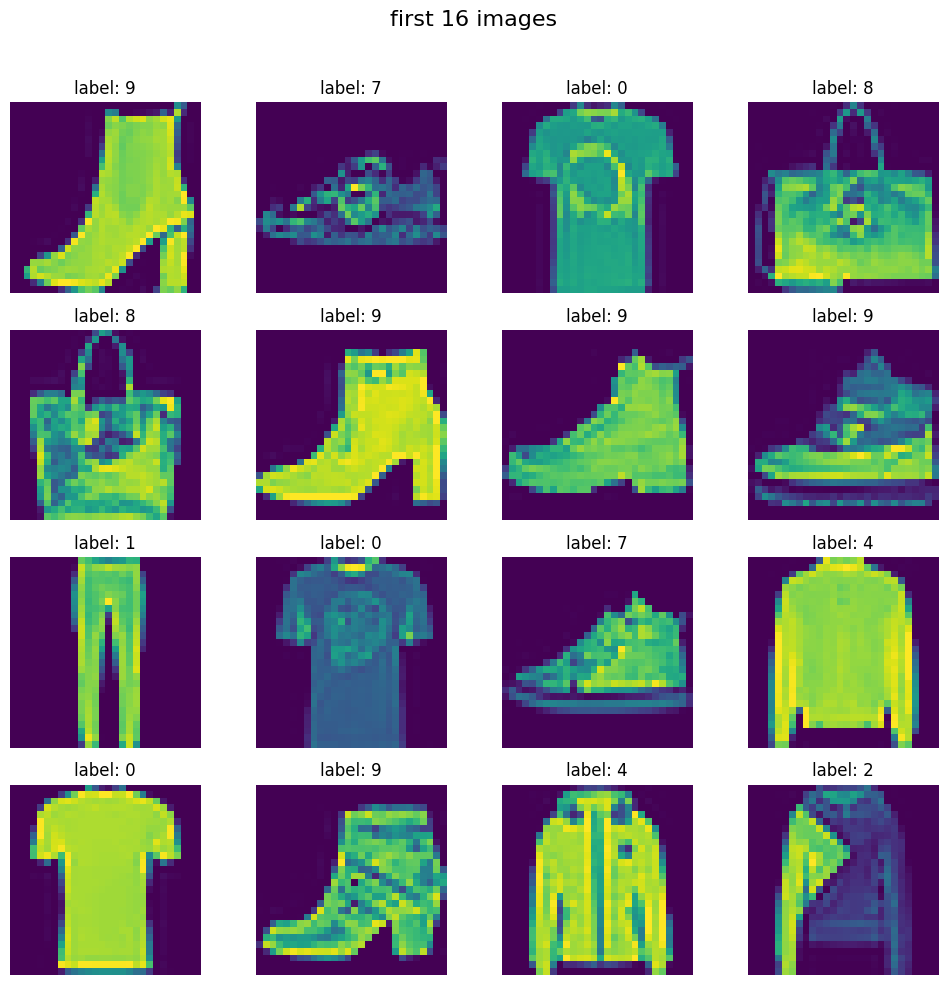

In [10]:
#create a 4x4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle('first 16 images', fontsize=16)

for i, ax in enumerate(axes.flat):
  img = df.iloc[i, 1:].values.reshape(28, 28)
  ax.imshow(img)
  ax.axis('off')
  ax.set_title(f"label: {df.iloc[i, 0]}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [11]:
X = df.iloc[:, 1:].values #selects all rows and selects all columns starting from index 1, so leaves the very first column
y = df.iloc[:, 0].values #selects all rows and selects the 0th column, since that is the target column in this dataset

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
#normalization
X_train = X_train / 255.0 #255 beacuse there are color values for pixel in dataset from 0 to 255 to normalize them we divide them by 255
X_test = X_test / 255.0

In [14]:
X_train

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.0627451, 0.       ,
        0.       ]])

In [59]:
class CustomDataset(Dataset):
  def __init__(self, features, labels):
    self.features = torch.tensor(features, dtype=torch.float32)
    self.labels = torch.tensor(labels, dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self, index):
    #if we want to perform any kind of transformation to the dtaa we do it here
    return self.features[index], self.labels[index]

In [60]:
#create train_dataset object
train_dataset = CustomDataset(X_train, y_train)
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [61]:
test_dataset = CustomDataset(X_test, y_test)

In [63]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [62]:
class MyNN(nn.Module):
  def __init__(self, num_features):

    #invoke parent class constructor
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 10)
    )

  def forward(self, x):

    return self.model(x)

In [64]:
epochs = 100
learning_rate = 0.1

In [65]:
X_train.shape

(4800, 784)

In [66]:
model = MyNN(X_train.shape[1])

#loss function
criterion = nn.CrossEntropyLoss()

#optimizer      Even though you haven’t called model.forward() yet, those layers and their parameters already exist, because they were created in __init__().
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [67]:
#training loop

for epoch in range(epochs):
  total_epoch_loss = 0

  for batch_features, batch_labels, in train_loader:

    #forward pass
    outputs = model(batch_features)

    #calculate loss
    loss = criterion(outputs, batch_labels)

    #back pass
    optimizer.zero_grad()
    loss.backward()

    #update gradients
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss/len(train_loader)
  print(f"epoch: {epoch+1}, loss: {avg_loss}")


epoch: 1, loss: 1.3243662337462108
epoch: 2, loss: 0.7838447103897731
epoch: 3, loss: 0.6599064405759175
epoch: 4, loss: 0.5859833552440008
epoch: 5, loss: 0.5384818468491236
epoch: 6, loss: 0.49510089576244354
epoch: 7, loss: 0.4726361411809921
epoch: 8, loss: 0.4521915292739868
epoch: 9, loss: 0.4183048553268115
epoch: 10, loss: 0.4099611809849739
epoch: 11, loss: 0.3805389852821827
epoch: 12, loss: 0.3624794540802638
epoch: 13, loss: 0.3454558433095614
epoch: 14, loss: 0.3309756050010522
epoch: 15, loss: 0.3266872856517633
epoch: 16, loss: 0.2982118955999613
epoch: 17, loss: 0.2944264587263266
epoch: 18, loss: 0.2811252352595329
epoch: 19, loss: 0.27115244172513486
epoch: 20, loss: 0.267205877477924
epoch: 21, loss: 0.26408561910192174
epoch: 22, loss: 0.26141461824377377
epoch: 23, loss: 0.2543482860674461
epoch: 24, loss: 0.22453853093087672
epoch: 25, loss: 0.21923571825027466
epoch: 26, loss: 0.22187970094382764
epoch: 27, loss: 0.21384940604368846
epoch: 28, loss: 0.19626102585

In [68]:
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [72]:
total = 0
correct = 0

with torch.no_grad():
  for batch_features, batch_labels in test_loader:

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(f"accuracy: {correct/total}")


accuracy: 0.8358333333333333
